In [34]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import os
import seaborn as sns

In [35]:
chile_df = pd.read_csv('data/chile.csv',  low_memory=False)
argentina_df = pd.read_csv('data/argentina.csv',  low_memory=False)
antartica_df = pd.read_csv('data/antartica.csv',  low_memory=False)

In [36]:
#info que muestre todos los datos 
chile_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no  

In [37]:
argentina_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no

In [38]:
antartica_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no

Como grupo fuimos viendo manualmente que columnas nos servirian para poder responder las preguntas planteadas en la propuesta inicial, y llegamos a un concenso de elegir las siguientes 19 columnas como base para poder responder estas.

In [39]:
columns = [
    'species_name',
    'occurrence_no',
    'accepted_name',
    'early_interval',
    'late_interval',
    'phylum',
    'class',
    'order',
    'family',
    'genus',
    'lat',
    'lng',
    'diet',
    'life_habit',
    "environment",
    "taxon_environment",
    "primary_name"
]

#Hacer que los df solo tengan las columnas que necesitamos
chile_df = chile_df[columns].copy()
argentina_df = argentina_df[columns].copy()
antartica_df = antartica_df[columns].copy()

In [40]:
chile_df

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name
0,ceciliana,16417,Leionucula,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula
1,amuriensis,16418,Nuculana,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana
2,cuneiformis,16419,Nuculana,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana
3,levitestata,16420,Yoldia,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculanida,Yoldiidae,Yoldia,-37.000000,-73.000000,deposit feeder,infaunal,NaN,"inner shelf,outer shelf,oceanic",Yoldia
4,pencana,16421,Neiloides,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculida,NO_FAMILY_SPECIFIED,Neiloides,-37.000000,-73.000000,deposit feeder,infaunal,NaN,NaN,Neiloides
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,sp.,1659402,Ostrea,Turonian,Campanian,Mollusca,Bivalvia,Ostreida,Ostreidae,Ostrea,-50.884998,-72.625000,suspension feeder,epifaunal,basinal (siliciclastic),"hypersaline,marine,brackish",Ostrea
9477,antarctica,1659403,Cucullaea antarctica,Turonian,Campanian,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-50.884998,-72.625000,suspension feeder,infaunal,basinal (siliciclastic),NaN,Cucullaea
9478,sp.,1659404,Nucula,Turonian,Campanian,Mollusca,Bivalvia,Nuculida,Nuculidae,Nucula,-50.884998,-72.625000,"deposit feeder, suspension feeder",infaunal,basinal (siliciclastic),"coastal,inner shelf,outer shelf,oceanic",Nucula
9479,saladensis,1660104,Micrauchenia saladensis,Tortonian,Messinian,Chordata,Mammalia,Panameriungulata,Macraucheniidae,Micrauchenia,-27.684723,-70.949997,herbivore,scansorial,coastal indet.,terrestrial,Micrauchenia


In [41]:
obtener_duplicados_chile = chile_df.duplicated(keep=False)
datos_duplicados_chile = chile_df[obtener_duplicados_chile]
datos_duplicados_chile

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name


In [42]:
obtener_duplicados_argentina = chile_df.duplicated(keep=False)
datos_duplicados_argentina = chile_df[obtener_duplicados_argentina]
datos_duplicados_argentina

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name


In [43]:
obtener_duplicados_antartica = antartica_df.duplicated(keep=False)
datos_duplicados_antartica = antartica_df[obtener_duplicados_antartica]
datos_duplicados_antartica

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name


Notamos que no hay datos duplicados, por ende no es necesario realizar ninguna acción adicional para eliminar duplicados.

In [44]:
chile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       9481 non-null   object 
 1   occurrence_no      9481 non-null   int64  
 2   accepted_name      9343 non-null   object 
 3   early_interval     9481 non-null   object 
 4   late_interval      1605 non-null   object 
 5   phylum             9337 non-null   object 
 6   class              9292 non-null   object 
 7   order              9123 non-null   object 
 8   family             8914 non-null   object 
 9   genus              8574 non-null   object 
 10  lat                9481 non-null   float64
 11  lng                9481 non-null   float64
 12  diet               8749 non-null   object 
 13  life_habit         8743 non-null   object 
 14  environment        9402 non-null   object 
 15  taxon_environment  5847 non-null   object 
 16  primary_name       9481 

In [45]:
argentina_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       31881 non-null  object 
 1   occurrence_no      31881 non-null  int64  
 2   accepted_name      31253 non-null  object 
 3   early_interval     31881 non-null  object 
 4   late_interval      5288 non-null   object 
 5   phylum             31226 non-null  object 
 6   class              31038 non-null  object 
 7   order              29738 non-null  object 
 8   family             29056 non-null  object 
 9   genus              27398 non-null  object 
 10  lat                31881 non-null  float64
 11  lng                31881 non-null  float64
 12  diet               24717 non-null  object 
 13  life_habit         22808 non-null  object 
 14  environment        31192 non-null  object 
 15  taxon_environment  18471 non-null  object 
 16  primary_name       318

In [46]:
antartica_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       11311 non-null  object 
 1   occurrence_no      11311 non-null  int64  
 2   accepted_name      10977 non-null  object 
 3   early_interval     11311 non-null  object 
 4   late_interval      2888 non-null   object 
 5   phylum             10960 non-null  object 
 6   class              10926 non-null  object 
 7   order              10744 non-null  object 
 8   family             10604 non-null  object 
 9   genus              10375 non-null  object 
 10  lat                11311 non-null  float64
 11  lng                11311 non-null  float64
 12  diet               7706 non-null   object 
 13  life_habit         6012 non-null   object 
 14  environment        10351 non-null  object 
 15  taxon_environment  5410 non-null   object 
 16  primary_name       113

In [47]:
chile_df['era_early'] = None
argentina_df['era_early'] = None
antartica_df['era_early'] = None

In [48]:
chile_df['era_late'] = None
argentina_df['era_late'] = None
antartica_df['era_late'] = None

In [49]:
cambrian_intervals = [
    "Early Terreneuvian", "Middle Terreneuvian", "Late Terreneuvian", "Terreneuvian",
    "Early Series 2", "Middle Series 2", "Late Series 2", "Series 2",
    "Early Miaolingian", "Middle Miaolingian", "Late Miaolingian", "Miaolingian",
    "Early Furongian", "Middle Furongian", "Late Furongian", "Furongian",
    "Early Fortunian", "Middle Fortunian", "Late Fortunian", "Fortunian",
    "Early Stage 2", "Middle Stage 2", "Late Stage 2", "Stage 2",
    "Early Stage 3", "Middle Stage 3", "Late Stage 3", "Stage 3",
    "Early Stage 4", "Middle Stage 4", "Late Stage 4", "Stage 4",
    "Early Wuliuan", "Middle Wuliuan", "Late Wuliuan", "Wuliuan",
    "Early Drumian", "Middle Drumian", "Late Drumian", "Drumian",
    "Early Guzhangian", "Middle Guzhangian", "Late Guzhangian", "Guzhangian",
    "Early Paibian", "Middle Paibian", "Late Paibian", "Paibian",
    "Early Jiangshanian", "Middle Jiangshanian", "Late Jiangshanian", "Jiangshanian",
    "Early Stage 10", "Middle Stage 10", "Late Stage 10", "Stage 10","Middle Cambrian", "Atdabanian",
    "Toyonian", "Botomian", "Early Cambrian", 'Floran', 'Lenian', 'Dresbachian',
    'Dolgellian', 'Merioneth', 'Trempealeauan', 'Idamean',
       'Sunwaptan','St Davids', 'Solvan', 'Dyeran', 'Wonokan',
        'Tulean', 'Blackhillsian'

]


silurian_intervals = [
    "Early Rhuddanian", "Middle Rhuddanian", "Late Rhuddanian", "Rhuddanian",
    "Early Aeronian", "Middle Aeronian", "Late Aeronian", "Aeronian",
    "Early Telychian", "Middle Telychian", "Late Telychian", "Telychian",
    "Early Sheinwoodian", "Middle Sheinwoodian", "Late Sheinwoodian", "Sheinwoodian",
    "Early Homerian", "Middle Homerian", "Late Homerian", "Homerian",
    "Early Gorstian", "Middle Gorstian", "Late Gorstian", "Gorstian",
    "Early Ludfordian", "Middle Ludfordian", "Late Ludfordian", "Ludfordian",
    "Early Llandovery", "Middle Llandovery", "Late Llandovery", "Llandovery",
    "Early Wenlock", "Middle Wenlock", "Late Wenlock", "Wenlock",
    "Early Ludlow", "Middle Ludlow", "Late Ludlow", "Ludlow",
    "Early Pridoli", "Middle Pridoli", "Late Pridoli", "Pridoli"
]


devonian_intervals = [
    "Early Lochkovian", "Middle Lochkovian", "Late Lochkovian", "Lochkovian",
    "Early Pragian", "Middle Pragian", "Late Pragian", "Pragian",
    "Early Emsian", "Middle Emsian", "Late Emsian", "Emsian",
    "Early Eifelian", "Middle Eifelian", "Late Eifelian", "Eifelian",
    "Early Givetian", "Middle Givetian", "Late Givetian", "Givetian",
    "Early Fransnian", "Middle Fransnian", "Late Fransnian", "Fransnian",
    "Early Famennian", "Middle Famennian", "Late Famennian", "Famennian",
    "Early Devonian", "Middle Devonian", "Late Devonian"
]


carboniferous_intervals = [
    "Early Tournaisian", "Middle Tournaisian", "Late Tournaisian", "Tournaisian",
    "Early Visean", "Middle Visean", "Late Visean", "Visean",
    "Early Serpukhovian", "Middle Serpukhovian", "Late Serpukhovian", "Serpukhovian",
    "Early Bashkirian", "Middle Bashkirian", "Late Bashkirian", "Bashkirian",
    "Early Moscovian", "Middle Moscovian", "Late Moscovian", "Moscovian",
    "Early Kasimovian", "Middle Kasimovian", "Late Kasimovian", "Kasimovian",
    "Early Gzhelian", "Middle Gzhelian", "Late Gzhelian", "Gzhelian",
    "Early Mississippian", "Middle Mississippian", "Late Mississippian", "Mississippian",
    "Early Pennsylvanian", "Middle Pennsylvanian", "Late Pennsylvanian", "Pennsylvanian",
    'Namurian', 'Virgilian', "Arnsbergian", 
]

permian_intervals = [
    "Early Asselian", "Middle Asselian", "Late Asselian", "Asselian",
    "Early Sakmarian", "Middle Sakmarian", "Late Sakmarian", "Sakmarian",
    "Early Artinskian", "Middle Artinskian", "Late Artinskian", "Artinskian",
    "Early Kungurian", "Middle Kungurian", "Late Kungurian", "Kungurian",
    "Early Roadian", "Middle Roadian", "Late Roadian", "Roadian",
    "Early Wordian", "Middle Wordian", "Late Wordian", "Wordian",
    "Early Capitanian", "Middle Capitanian", "Late Capitanian", "Capitanian",
    "Early Wuchiapingian", "Middle Wuchiapingian", "Late Wuchiapingian", "Wuchiapingian",
    "Early Changhsingian", "Middle Changhsingian", "Late Changhsingian", "Changhsingian",
    "Early Cisuralian", "Middle Cisuralian", "Late Cisuralian", "Cisuralian",
    "Early Guadalupian", "Middle Guadalupian", "Late Guadalupian", "Guadalupian",
    "Early Lopingian", "Middle Lopingian", "Late Lopingian", "Lopingian"
]


ordovician_intervals = [
    "Early Ordovician", "Middle Ordovician", "Late Ordovician",
    "Early Tremadocian", "Middle Tremadocian", "Late Tremadocian", "Tremadocian",
    "Early Floian", "Middle Floian", "Late Floian", "Floian",
    "Early Dapingian", "Middle Dapingian", "Late Dapingian", "Dapingian",
    "Early Darriwilian", "Middle Darriwilian", "Late Darriwilian", "Darriwilian",
    "Early Sandbian", "Middle Sandbian", "Late Sandbian", "Sandbian",
    "Early Katian", "Middle Katian", "Late Katian", "Katian",
    "Early Hirnantian", "Middle Hirnantian", "Late Hirnantian", "Hirnantian",
    'Arenig', 'Early Llanvirn', 'Ibex', 'Tremadoc', 'Llanvirn', 'Gisbornian',
    'Caradoc', 'Early Llandeilo','Costonian', 'Actonian', 'Late Llandeilo',
    'Longvillian', 'Llandeilo', 'Arenigian', 'Late Llanvirn', 'Whiterockian',
    'Skullrockian', 'Stairsian'
]

triassic_intervals = [
    "Early Induan", "Middle Induan", "Late Induan", "Induan",
    "Early Anisian", "Middle Anisian", "Late Anisian", "Anisian",
    "Early Ladinian", "Middle Ladinian", "Late Ladinian", "Ladinian",
    "Early Carnian", "Middle Carnian", "Late Carnian", "Carnian",
    "Early Norian", "Middle Norian", "Late Norian", "Norian",
    "Early Rhaetian", "Middle Rhaetian", "Late Rhaetian", "Rhaetian",
    "Early Triassic", "Middle Triassic", "Late Triassic", 'Sevatian',
    'Olenekian', 'Longobardian'
]


neogene_intervals = [
    "Early Miocene", "Middle Miocene", "Late Miocene", "Miocene",
    "Early Pliocene", "Middle Pliocene", "Late Pliocene", "Pliocene",
    "Early Aquitanian", "Middle Aquitanian", "Late Aquitanian", "Aquitanian",
    "Early Burdigalian", "Middle Burdigalian", "Late Burdigalian", "Burdigalian",
    "Early Langhian", "Middle Langhian", "Late Langhian", "Langhian",
    "Early Serrevallian", "Middle Serrevallian", "Late Serrevallian", "Serrevallian",
    "Early Tortonian", "Middle Tortonian", "Late Tortonian", "Tortonian",
    "Early Messinian", "Middle Messinian", "Late Messinian", "Messinian",
    "Early Zanclean", "Middle Zanclean", "Late Zanclean", "Zanclean",
    "Early Piacenzian", "Middle Piacenzian", "Late Piacenzian", "Piacenzian",
    'Serravallian', 'Colhuehuapian', 'Santacrucian','Friasian',
    'Chasicoan', 'Montehermosan', 'Huayquerian', 'Chapadmalalan',
    'Colloncuran', 'Mayoan'
]


quaternary_intervals = [
    "Early Pleistocene", "Middle Pleistocene", "Late Pleistocene", "Pleistocene",
    "Early Gelasian", "Middle Gelasian", "Late Gelasian", "Gelasian",
    "Early Calabrian", "Middle Calabrian", "Late Calabrian", "Calabrian",
    "Early Chibanian", "Middle Chibanian", "Late Chibanian", "Chibanian",
    'Holocene', 'Lujanian', 'Ensenadan', 'Ionian', 'Uquian'
]


jurassic_intervals = [
    "Early Hettangian", "Middle Hettangian", "Late Hettangian", "Hettangian",
    "Early Sinemurian", "Middle Sinemurian", "Late Sinemurian", "Sinemurian",
    "Early Pliensbachian", "Middle Pliensbachian", "Late Pliensbachian", "Pliensbachian",
    "Early Toarcian", "Middle Toarcian", "Late Toarcian", "Toarcian",
    "Early Aalenian", "Middle Aalenian", "Late Aalenian", "Aalenian",
    "Early Bajocian", "Middle Bajocian", "Late Bajocian", "Bajocian",
    "Early Bathonian", "Middle Bathonian", "Late Bathonian", "Bathonian",
    "Early Callovian", "Middle Callovian", "Late Callovian", "Callovian",
    "Early Oxfordian", "Middle Oxfordian", "Late Oxfordian", "Oxfordian",
    "Early Kimmeridgian", "Middle Kimmeridgian", "Late Kimmeridgian", "Kimmeridgian",
    "Early Tithonian", "Middle Tithonian", "Late Tithonian", "Tithonian",
    "Early Jurassic", "Middle Jurassic", "Late Jurassic", 'Planorbis',
    'Margaritatus', 'Variabilis', 'Opalinum','Angulata', 'Obtusum',
    'Falciferum', 'Bifrons', 'Murchisonae', 'Jamesoni', 'Spinatum',
    'Davoei', 'Liasicus', 'Bucklandi', 'Concavum'
]


paleogene_intervals = [
    "Early Paleocene", "Middle Paleocene", "Late Paleocene", "Paleocene",
    "Early Eocene", "Middle Eocene", "Late Eocene", "Eocene",
    "Early Oligocene", "Middle Oligocene", "Late Oligocene", "Oligocene",
    "Early Danian", "Middle Danian", "Late Danian", "Danian",
    "Early Selandian", "Middle Selandian", "Late Selandian", "Selandian",
    "Early Thanetian", "Middle Thanetian", "Late Thanetian", "Thanetian",
    "Early Ypresian", "Middle Ypresian", "Late Ypresian", "Ypresian",
    "Early Lutetian", "Middle Lutetian", "Late Lutetian", "Lutetian",
    "Early Bartonian", "Middle Bartonian", "Late Bartonian", "Bartonian",
    "Early Priabonian", "Middle Priabonian", "Late Priabonian", "Priabonian",
    "Early Rupelian", "Middle Rupelian", "Late Rupelian", "Rupelian",
    "Early Chattian", "Middle Chattian", "Late Chattian", "Chattian",
    'Casamayoran', 'Tinguirirican', 'Riochican', 'Deseadan', 'Mustersan',
    'Divisaderan'
]

cretaceous_intervals = [
    "Early Berriasian", "Middle Berriasian", "Late Berriasian", "Berriasian",
    "Early Valanginian", "Middle Valanginian", "Late Valanginian", "Valanginian",
    "Early Hauterivian", "Middle Hauterivian", "Late Hauterivian", "Hauterivian",
    "Early Barremian", "Middle Barremian", "Late Barremian", "Barremian",
    "Early Aptian", "Middle Aptian", "Late Aptian", "Aptian",
    "Early Albian", "Middle Albian", "Late Albian", "Albian",
    "Early Cenomanian", "Middle Cenomanian", "Late Cenomanian", "Cenomanian",
    "Early Turonian", "Middle Turonian", "Late Turonian", "Turonian",
    "Early Coniacian", "Middle Coniacian", "Late Coniacian", "Coniacian",
    "Early Santonian", "Middle Santonian", "Late Santonian", "Santonian",
    "Early Campanian", "Middle Campanian", "Late Campanian", "Campanian",
    "Early Maastrichtian", "Middle Maastrichtian", "Late Maastrichtian", "Maastrichtian",
    "Early Cretaceous", "Late Cretaceous", 'Neocomian','Senonian'
]

ediacaran_intervals = ["Ediacaran"]

cryogenian_intervals = ["Cryogenian"]

tonian_intervals = ["Tonian"]

siderian_intervals = ["Siderian"]
rhyacian_intervals = ["Rhyacian"]
orosirian_intervals = ["Orosirian"]
statherian_intervals = ["Statherian"]
calymmian_intervals = ["Calymmian"]
ectasian_intervals = ["Ectasian"]
stenian_intervals = ["Stenian"]

nan = [np.nan]

In [50]:
def assign_era(row):
    if row['early_interval'] in cambrian_intervals:
        return 'Cambrian'
    elif row['early_interval'] in ordovician_intervals:
        return 'Ordovician'
    elif row['early_interval'] in silurian_intervals:
        return 'Silurian'
    elif row['early_interval'] in devonian_intervals:
        return 'Devonian'
    elif row['early_interval'] in carboniferous_intervals:
        return 'Carboniferous'
    elif row['early_interval'] in permian_intervals:
        return 'Permian'
    elif row['early_interval'] in triassic_intervals:
        return 'Triassic'
    elif row['early_interval'] in jurassic_intervals:
        return 'Jurassic'
    elif row['early_interval'] in cretaceous_intervals:
        return 'Cretaceous'
    elif row['early_interval'] in paleogene_intervals:
        return 'Paleogene'
    elif row['early_interval'] in neogene_intervals:
        return 'Neogene'
    elif row['early_interval'] in quaternary_intervals:
        return 'Quaternary'
    elif row['early_interval'] in nan:
        return "No especificado"
    else:
        return row['early_interval']

In [51]:
def assign_era_late(row):
    if row['late_interval'] in cambrian_intervals:
        return 'Cambrian'
    elif row['late_interval'] in ordovician_intervals:
        return 'Ordovician'
    elif row['late_interval'] in silurian_intervals:
        return 'Silurian'
    elif row['late_interval'] in devonian_intervals:
        return 'Devonian'
    elif row['late_interval'] in carboniferous_intervals:
        return 'Carboniferous'
    elif row['late_interval'] in permian_intervals:
        return 'Permian'
    elif row['late_interval'] in triassic_intervals:
        return 'Triassic'
    elif row['late_interval'] in jurassic_intervals:
        return 'Jurassic'
    elif row['late_interval'] in cretaceous_intervals:
        return 'Cretaceous'
    elif row['late_interval'] in paleogene_intervals:
        return 'Paleogene'
    elif row['late_interval'] in neogene_intervals:
        return 'Neogene'
    elif row['late_interval'] in quaternary_intervals:
        return 'Quaternary'
    elif row['late_interval'] in nan:
        return "No especificado"
    else:
        return row['late_interval']

In [52]:
chile_df['era_early'] = chile_df.apply(assign_era, axis=1)
argentina_df['era_early'] = argentina_df.apply(assign_era, axis=1)
antartica_df['era_early'] = antartica_df.apply(assign_era, axis=1)

In [53]:
chile_df['era_late'] = chile_df.apply(assign_era_late, axis=1)
argentina_df['era_late'] = argentina_df.apply(assign_era_late, axis=1)
antartica_df['era_late'] = antartica_df.apply(assign_era_late, axis=1)

In [54]:
chile_df.drop(columns=['late_interval', 'early_interval'], inplace=True)
argentina_df.drop(columns=['late_interval', 'early_interval'], inplace=True)
antartica_df.drop(columns=['late_interval', 'early_interval'], inplace=True)


In [55]:
chile_df.head()

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late
0,ceciliana,16417,Leionucula,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula,Cretaceous,No especificado
1,amuriensis,16418,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado
2,cuneiformis,16419,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado
3,levitestata,16420,Yoldia,Mollusca,Bivalvia,Nuculanida,Yoldiidae,Yoldia,-37.0,-73.0,deposit feeder,infaunal,NaN,"inner shelf,outer shelf,oceanic",Yoldia,Cretaceous,No especificado
4,pencana,16421,Neiloides,Mollusca,Bivalvia,Nuculida,NO_FAMILY_SPECIFIED,Neiloides,-37.0,-73.0,deposit feeder,infaunal,NaN,NaN,Neiloides,Cretaceous,No especificado


In [56]:
argentina_df.head()

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late
0,sp.,17744,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-39.0,-69.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado
1,rocana,17745,Cucullaea,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-39.0,-69.0,suspension feeder,infaunal,NaN,NaN,Cucullaea,Cretaceous,No especificado
2,feruglioli,17746,Glycymerita,Mollusca,Bivalvia,Arcida,Glycymerididae,Glycymerita,-39.0,-69.0,suspension feeder,semi-infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Glycymerita,Cretaceous,No especificado
3,sp.,17747,Glycymerita,Mollusca,Bivalvia,Arcida,Glycymerididae,Glycymerita,-39.0,-69.0,suspension feeder,semi-infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Glycymerita,Cretaceous,No especificado
4,mechanquilensis,17748,Inoceramus,Mollusca,Bivalvia,Myalinida,Inoceramidae,Inoceramus,-39.0,-69.0,suspension feeder,epifaunal,NaN,NaN,Inoceramus,Cretaceous,No especificado


In [57]:
antartica_df.head()

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late
0,rossiana,16484,Solemya,Mollusca,Bivalvia,Solemyida,Solemyidae,Solemya,-64.0,-57.0,"deposit feeder, chemosymbiotic",deep infaunal,NaN,"lagoonal,coastal,inner shelf,outer shelf,oceanic",Solemya,Cretaceous,No especificado
1,suboblonga,16485,Nucula (Leionucula) suboblonga,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-64.0,-57.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula,Cretaceous,No especificado
2,nordenskjoldi,16486,Nordenskjoeldia,Mollusca,Bivalvia,Arcida,Parallelodontidae,Nordenskjoeldia,-64.0,-57.0,suspension feeder,low-level epifaunal,NaN,NaN,Nordenskjoeldia,Cretaceous,No especificado
3,oliveroi,16487,NaN,NaN,NaN,NaN,NaN,NaN,-64.0,-57.0,NaN,NaN,NaN,NaN,Austrocucullaea,Cretaceous,No especificado
4,antarctica,16488,Cucullaea antarctica,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-64.0,-57.0,suspension feeder,infaunal,NaN,NaN,Cucullaea,Cretaceous,No especificado


# ¿Qué diferencias y similitudes existen en la biodiversidad fósil entre estas regiones a lo largo de diferentes eras geológicas?


### Enfoque y Objetivo

En este análisis, buscamos explorar la biodiversidad fósil en Chile, Argentina y Antartica utilizando índices de biodiversidad a lo largo de diferentes eras geológicas. 
El objetivo es comparar la diversidad a tres niveles taxonómicos:
1. **Especies**
2. **Géneros**
3. **Familias**

Este enfoque nos permitirá:
- Identificar cómo cambian los patrones de diversidad entre niveles taxonómicos.
- Detectar eras con alta o baja biodiversidad en términos de riqueza y equitatividad.
- Explorar si los patrones observados a nivel de especies se mantienen en niveles taxonómicos más amplios.

Utilizaremos **índices de biodiversidad** como:

### **Índice de Shannon**
$$ H' = -\sum_{i=1}^S p_i \ln(p_i) $$

- $H'$: Índice de Shannon (la medida de diversidad).
- $S$: Número total de grupos (por ejemplo, especies, géneros o familias).
- $p_i$: Proporción de individuos del grupo $i$ en relación al total. Se calcula como:
  $$ p_i = \frac{n_i}{N} $$

- $n_i$: Número de individuos en el grupo $i$.
- $N$: Número total de individuos en la comunidad.

---

- Mide la diversidad combinando **riqueza** (cantidad de grupos) y **equitatividad** (distribución de los individuos entre los grupos).
- Valores más altos indican mayor diversidad y equitatividad.

| **Índice de Shannon** | **Significado**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| **0**                 | No hay diversidad (solo hay un grupo, por ejemplo, una sola especie).           |
| **1-2**               | Baja diversidad, dominada por unas pocas especies (grupos).                     |
| **3-4**               | Diversidad moderada; hay más grupos y una mejor distribución entre ellos.        |
| **5 o más**           | Alta diversidad; hay una gran cantidad de grupos y están distribuidos uniformemente. |

---

### **Índice de Simpson**

$$ D = 1 - \sum_{i=1}^S p_i^2 $$

- $D$: Índice de Simpson (la medida de diversidad).
- $S$: Número total de grupos (por ejemplo, especies, géneros o familias).
- $p_i$: Proporción de individuos del grupo $i$ en relación al total. Se calcula como:
  $$ p_i = \frac{n_i}{N} $$

- $n_i$: Número de individuos en el grupo $i$.
- $N$: Número total de individuos en la comunidad.
---
- Mide la **probabilidad de que dos individuos seleccionados al azar pertenezcan al mismo grupo**.
- A diferencia de Shannon, es más sensible a la **dominancia** de unos pocos grupos. Valores altos reflejan **menos dominancia** y mayor equitatividad.

| **Índice de Simpson** | **Significado**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| **0**                 | Total dominancia; todos los individuos pertenecen a un solo grupo.              |
| **0.1-0.4**           | Baja equitatividad; dominancia de unos pocos grupos.                            |
| **0.5-0.7**           | Moderada equitatividad; cierta dominancia, pero con más grupos presentes.        |
| **0.8 o más**         | Alta equitatividad; las especies (grupos) están distribuidas uniformemente.      |

---

### Estructura del Análisis

1. **Calcular índices de biodiversidad**:
   Aplicaremos los índices a las eras con mayor riqueza para especies, géneros y familias.
2. **Visualizar resultados**:
   Compararemos los índices entre niveles taxonómicos y eras.
3. **Interpretar patrones**:
   Discutiremos cómo los patrones de biodiversidad varían a lo largo del tiempo y entre niveles taxonómicos.

---


## Chile 



In [58]:
#En primer lugar para el analisis taxonomico dropearemos aquellas filas que tengan valores nulos en la columna species_name, genus y family

chile_df.dropna(subset=['species_name', 'genus', 'family'], inplace=True)

In [59]:
# Seleccionar las top 5 eras con más especies únicas
top5_chile_especies = chile_df.groupby('era_early')['species_name'].nunique().nlargest(5)

# Mostrar las top 5 eras
print("Top 5 eras por especies únicas en Chile:")
print(top5_chile_especies)


Top 5 eras por especies únicas en Chile:
era_early
Neogene       459
Jurassic      425
Cretaceous    316
Quaternary    155
Triassic       98
Name: species_name, dtype: int64


## Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Chile a cada nivel taxonómico (especies, géneros y familias).


In [60]:
from scipy.stats import entropy

# Función para calcular índices de biodiversidad
def calcular_indices(df, eras, nivel_taxonomico):
    indices = {}
    for era in eras.index:
        subset = df[df['era_early'] == era]
        taxon_counts = subset[nivel_taxonomico].value_counts()
        total_counts = taxon_counts.sum()
        proportions = taxon_counts / total_counts
        shannon_index = entropy(proportions, base=2)  # Shannon Index
        simpson_index = 1 - sum(proportions**2)      # Simpson Index
        indices[era] = {'Shannon': shannon_index, 'Simpson': simpson_index}
    return indices

# Calcular índices para los niveles taxonómicos (especies, géneros, familias)
indices_chile_especies = calcular_indices(chile_df, top5_chile_especies, 'species_name')
indices_chile_generos = calcular_indices(chile_df, top5_chile_especies, 'genus')  # Misma top 5
indices_chile_familias = calcular_indices(chile_df, top5_chile_especies, 'family')  # Misma top 5

# Mostrar resultados
print("\nÍndices por especies en Chile:")
print(pd.DataFrame(indices_chile_especies).T)

print("\nÍndices por géneros en Chile:")
print(pd.DataFrame(indices_chile_generos).T)

print("\nÍndices por familias en Chile:")
print(pd.DataFrame(indices_chile_familias).T)


Índices por especies en Chile:
             Shannon   Simpson
Neogene     6.696318  0.916319
Jurassic    6.043663  0.919406
Cretaceous  6.207675  0.894245
Quaternary  6.082838  0.960376
Triassic    5.025399  0.873993

Índices por géneros en Chile:
             Shannon   Simpson
Neogene     7.969223  0.993161
Jurassic    7.055302  0.984711
Cretaceous  7.688936  0.991922
Quaternary  6.663366  0.985421
Triassic    6.288502  0.979896

Índices por familias en Chile:
             Shannon   Simpson
Neogene     6.766321  0.984143
Jurassic    5.853764  0.971319
Cretaceous  6.231363  0.975127
Quaternary  5.742930  0.970401
Triassic    4.956912  0.908194


## Visualización de Índices de Biodiversidad en Chile

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Chile, comparando los diferentes niveles taxonómicos.


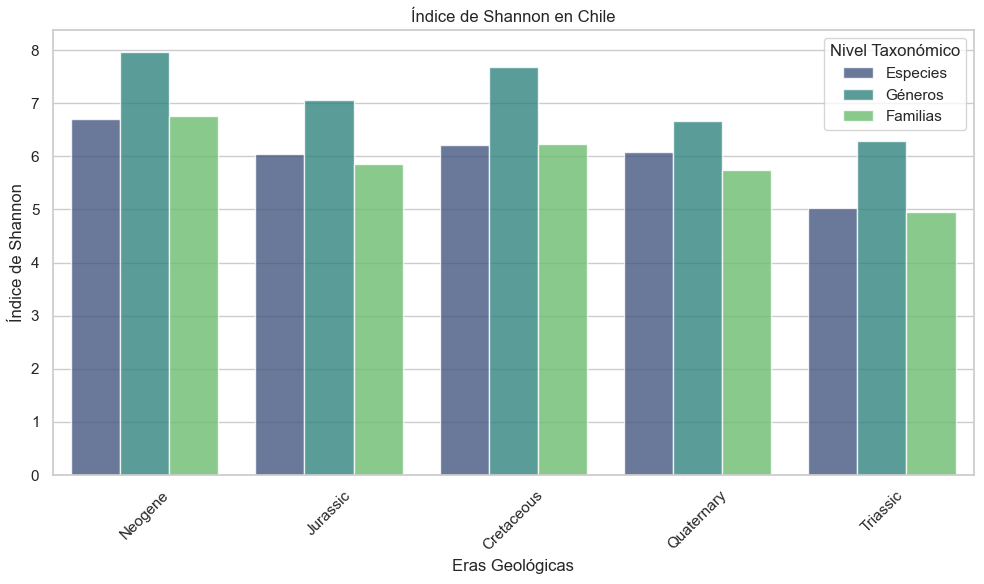

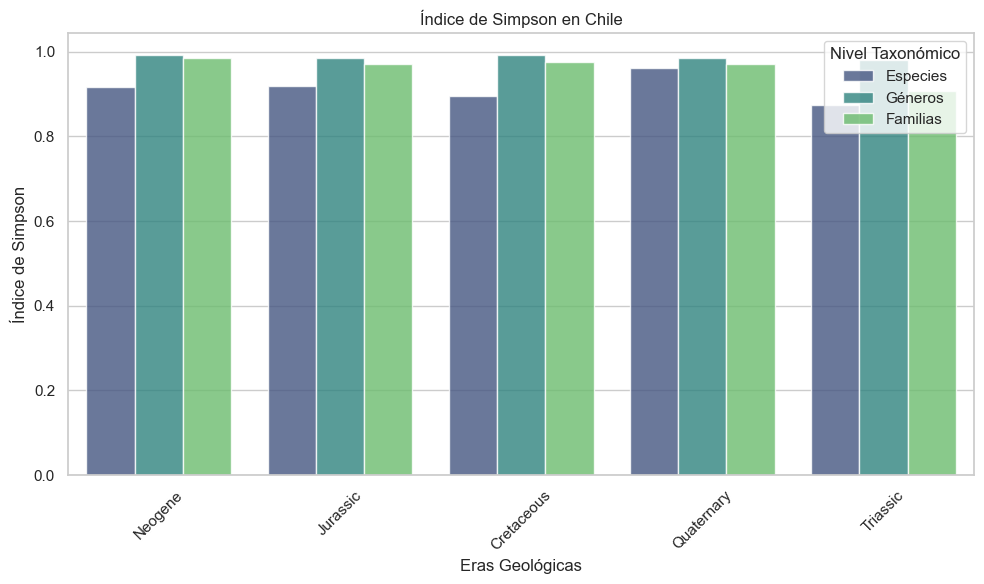

In [ ]:
# Preparar los datos para visualización
df_especies = pd.DataFrame(indices_chile_especies).T
df_generos = pd.DataFrame(indices_chile_generos).T
df_familias = pd.DataFrame(indices_chile_familias).T

# Añadir nivel taxonómico
df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'

# Combinar todos los niveles taxonómicos
df_total_chile = pd.concat([df_especies, df_generos, df_familias])
df_total_chile.reset_index(inplace=True)
df_total_chile.rename(columns={'index': 'Era'}, inplace=True)

# Configurar gráficos separados
sns.set_theme(style="whitegrid")

# Histograma Shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_chile,x='Era', y='Shannon', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en Chile')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma Simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_chile,x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en Chile')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Observaciones 

1. **Neogene como la era más diversa**:
   - El **Neogene** destaca como la era con mayor cantidad de **especies únicas** en Chile, lo que se refleja en los índices más altos de Shannon y Simpson en todos los niveles taxonómicos (especies, géneros y familias).
   - Esto sugiere un período de gran biodiversidad fósil, posiblemente asociado a eventos evolutivos o condiciones ambientales favorables.

2. **Cretaceous con alta diversidad**:
   - Aunque no alcanza el nivel del Neogene, el **Cretaceous** también presenta índices de biodiversidad elevados, especialmente en géneros.

3. **Triassic con menor diversidad**:
   - El **Triassic** muestra los valores más bajos en ambos índices, lo que indica una biodiversidad limitada en esta era.

4. **Consistencia en la distribución**:
   - El índice de Simpson cercano a 1 en todas las eras sugiere que la distribución entre especies, géneros y familias es relativamente equitativa.

---




## Argentina


In [62]:
argentina_df.dropna(subset=['species_name', 'genus', 'family'], inplace=True)

In [63]:
# Seleccionar las top 5 eras con más especies únicas
top5_argentina_especies = argentina_df.groupby('era_early')['species_name'].nunique().nlargest(5)

# Mostrar las top 5 eras
print("Top 5 eras por especies únicas en Argentina:")
print(top5_argentina_especies)


Top 5 eras por especies únicas en Argentina:
era_early
Paleogene     1508
Neogene       1297
Cretaceous    1231
Ordovician     522
Jurassic       455
Name: species_name, dtype: int64


## Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Argentina a cada nivel taxonómico (especies, géneros y familias).


In [64]:
# Calcular índices para los niveles taxonómicos (especies, géneros, familias)
indices_argentina_especies = calcular_indices(argentina_df, top5_argentina_especies, 'species_name')
indices_argentina_generos = calcular_indices(argentina_df, top5_argentina_especies, 'genus')  # Misma top 5
indices_argentina_familias = calcular_indices(argentina_df, top5_argentina_especies, 'family')  # Misma top 5

# Mostrar resultados
print("\nÍndices por especies en argentina:")
print(pd.DataFrame(indices_argentina_especies).T)

print("\nÍndices por géneros en argentina:")
print(pd.DataFrame(indices_argentina_generos).T)

print("\nÍndices por familias en argentina:")
print(pd.DataFrame(indices_argentina_familias).T)


Índices por especies en argentina:
             Shannon   Simpson
Paleogene   8.544585  0.972890
Neogene     8.028244  0.950195
Cretaceous  7.962777  0.953910
Ordovician  6.381912  0.897559
Jurassic    6.841167  0.954667

Índices por géneros en argentina:
             Shannon   Simpson
Paleogene   9.091181  0.996431
Neogene     8.916679  0.996107
Cretaceous  9.091962  0.996489
Ordovician  7.958738  0.990973
Jurassic    7.969151  0.993136

Índices por familias en argentina:
             Shannon   Simpson
Paleogene   6.251061  0.932428
Neogene     6.269807  0.963560
Cretaceous  6.070854  0.922424
Ordovician  5.920015  0.953569
Jurassic    6.016167  0.968263


## Visualización de Índices de Biodiversidad en Argentina

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Argentina, comparando los diferentes niveles taxonómicos.


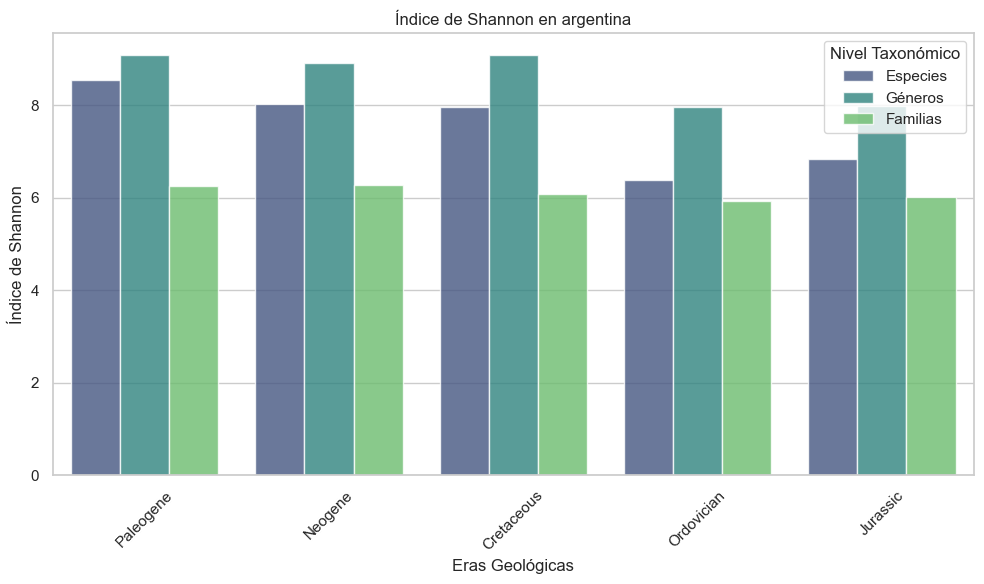

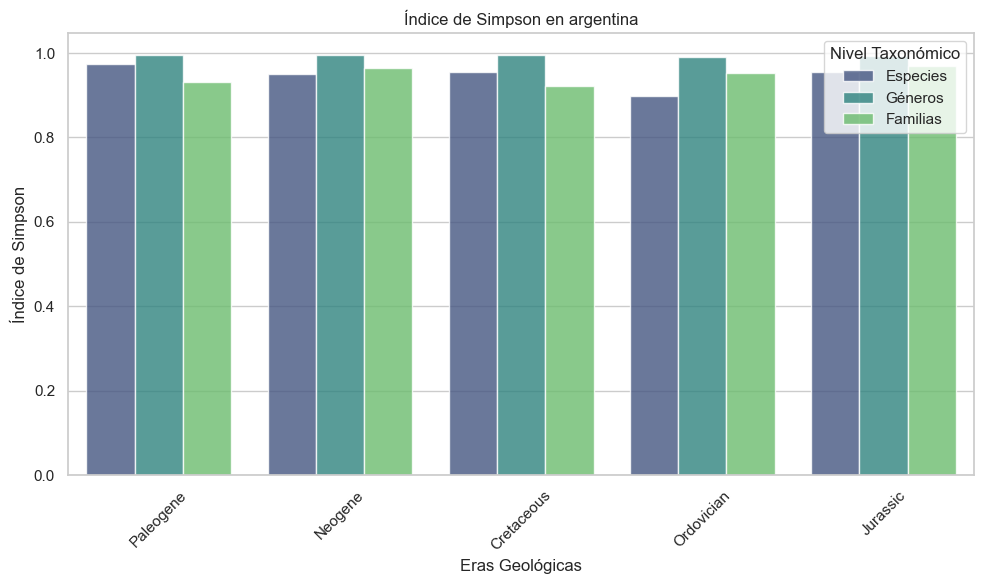

In [ ]:
# Preparar los datos para visualización
df_especies = pd.DataFrame(indices_argentina_especies).T
df_generos = pd.DataFrame(indices_argentina_generos).T
df_familias = pd.DataFrame(indices_argentina_familias).T

# Añadir nivel taxonómico
df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'

# Combinar todos los niveles taxonómicos
df_total_argentina = pd.concat([df_especies, df_generos, df_familias])
df_total_argentina.reset_index(inplace=True)
df_total_argentina.rename(columns={'index': 'Era'}, inplace=True)

# Configurar gráficos separados
sns.set_theme(style="whitegrid")

# Histograma Shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_argentina, x='Era', y='Shannon', hue='Nivel', palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en argentina')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma Simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_argentina, x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en argentina')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Observaciones

1. **Paleogene y Cretaceous destacan en diversidad**:
   - **Paleogene** y **Cretaceous** muestran los índices de Shannon más altos, indicando una mayor diversidad taxonómica en estas eras.
   - Esto es consistente tanto para especies como para géneros y familias.

2. **Neogene con diversidad moderada**:
   - Aunque el **Neogene** tiene índices elevados, no alcanza el nivel de diversidad observado en el **Paleogene** y **Cretaceous**.
   - Esto contrasta con los resultados de Chile, donde el Neogene era la era más diversa.

3. **Ordovician con menor diversidad**:
   - La era **Ordovician** presenta los índices de Shannon más bajos en todos los niveles taxonómicos (especies, géneros, familias), lo que sugiere una biodiversidad más limitada durante este período.

4. **Equitatividad alta en todas las eras**:
   - El índice de Simpson es consistentemente alto (cercano a 1) en todas las eras, lo que indica una distribución equitativa entre los grupos taxonómicos.

5. **Consistencia entre niveles taxonómicos**:
   - Aunque los valores absolutos difieren, los patrones generales de biodiversidad son similares para especies, géneros y familias. Esto sugiere que la estructura taxonómica se mantiene coherente entre niveles.


---


## Antartica

In [ ]:
antartica_df.dropna(subset=['species_name', 'genus', 'family'], inplace=True)

In [69]:
# Seleccionar las top 5 eras con más especies únicas
top5_antartica_especies = antartica_df.groupby('era_early')['species_name'].nunique().nlargest(5)

# Mostrar las top 5 eras
print("Top 5 eras por especies únicas en antartica:")
print(top5_antartica_especies)


Top 5 eras por especies únicas en antartica:
era_early
Cretaceous    847
Paleogene     651
Jurassic      269
Cambrian      159
Quaternary     85
Name: species_name, dtype: int64


## Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Antartica a cada nivel taxonómico (especies, géneros y familias).


In [70]:
# Calcular índices para los niveles taxonómicos (especies, géneros, familias)
indices_antartica_especies = calcular_indices(antartica_df, top5_antartica_especies, 'species_name')
indices_antartica_generos = calcular_indices(antartica_df, top5_antartica_especies, 'genus')  # Misma top 5
indices_antartica_familias = calcular_indices(antartica_df, top5_antartica_especies, 'family')  # Misma top 5

# Mostrar resultados
print("\nÍndices por especies en antartica:")
print(pd.DataFrame(indices_antartica_especies).T)

print("\nÍndices por géneros en antartica:")
print(pd.DataFrame(indices_antartica_generos).T)

print("\nÍndices por familias en antartica:")
print(pd.DataFrame(indices_antartica_familias).T)


Índices por especies en antartica:
             Shannon   Simpson
Cretaceous  7.678623  0.973377
Paleogene   7.826782  0.979915
Jurassic    6.816328  0.978596
Cambrian    6.089904  0.932219
Quaternary  5.346529  0.939488

Índices por géneros en antartica:
             Shannon   Simpson
Cretaceous  8.212143  0.993433
Paleogene   7.835154  0.989796
Jurassic    6.404770  0.976696
Cambrian    7.168272  0.991198
Quaternary  5.450099  0.967561

Índices por familias en antartica:
             Shannon   Simpson
Cretaceous  5.382490  0.911279
Paleogene   5.847981  0.930837
Jurassic    5.191158  0.946169
Cambrian    6.156515  0.979034
Quaternary  5.078056  0.961610


## Visualización de Índices de Biodiversidad en Antartica

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Antartica, comparando los diferentes niveles taxonómicos.


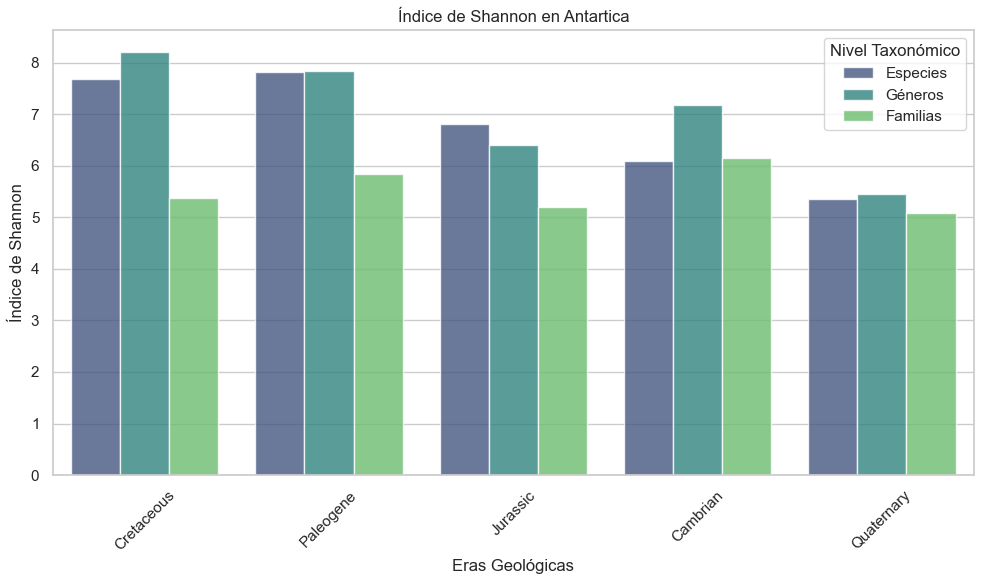

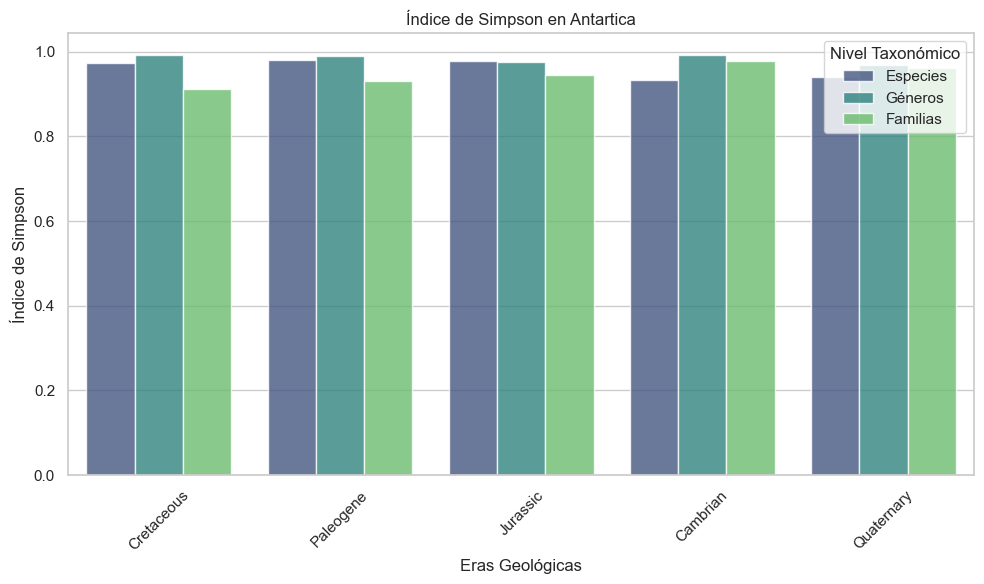

In [ ]:
# Preparar los datos para visualización
df_especies = pd.DataFrame(indices_antartica_especies).T
df_generos = pd.DataFrame(indices_antartica_generos).T
df_familias = pd.DataFrame(indices_antartica_familias).T

# Añadir nivel taxonómico
df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'

# Combinar todos los niveles taxonómicos
df_total_antartica = pd.concat([df_especies, df_generos, df_familias])
df_total_antartica.reset_index(inplace=True)
df_total_antartica.rename(columns={'index': 'Era'}, inplace=True)

# Configurar gráficos separados
sns.set_theme(style="whitegrid")

# Histograma Shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_antartica,x='Era', y='Shannon', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en Antartica')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma Simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_antartica,x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en Antartica')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observaciones 
1. **Cretaceous como la era más diversa**:
   - El **Cretaceous** muestra los índices de Shannon más altos, destacándose como la era más diversa en términos de especies, géneros y familias.
   - Esto es consistente con los patrones observados en otras regiones, pero aquí la diferencia es más marcada.

2. **Paleogene y Cambrian con alta diversidad**:
   - El **Paleogene** y el **Cambrian** también presentan índices de Shannon elevados, indicando una diversidad significativa en estas eras.
   - Particularmente en géneros, el Cambrian muestra una diversidad comparable a la del Paleogene.

3. **Quaternary con menor diversidad**:
   - El **Quaternary** tiene los índices de Shannon más bajos en todos los niveles taxonómicos, lo que sugiere una biodiversidad limitada en este período en la Antártida.

4. **Equitatividad alta en todas las eras**:
   - Al igual que en Chile y Argentina, el índice de Simpson es consistentemente alto (cercano a 1) en todas las eras, lo que indica una distribución equitativa entre los grupos taxonómicos.

5. **Distribución de diversidad entre niveles taxonómicos**:
   - Géneros suelen presentar los índices más altos, seguidos por familias, y especies suelen tener índices más bajos, lo que refleja una mayor riqueza y equitatividad en niveles taxonómicos más amplios.


## **Comparación entre Chile y Argentina en las eras comunes**


1. **Diversidad (Índice de Shannon)**:
   - Argentina muestra consistentemente una mayor diversidad en **especies** y **géneros** para todas las eras comunes.
   - Chile tiene una leve ventaja en la diversidad de **familias** durante **Neogene** y **Cretaceous**, pero Argentina lidera en **Jurassic**.

2. **Equitatividad (Índice de Simpson)**:
   - Argentina tiene una mejor distribución equitativa en **especies** y **géneros** en todas las eras.
   - Chile destaca en equitatividad a nivel de **familias**, particularmente en **Neogene** y **Cretaceous**.

3. **Patrones Generales**:
   - Argentina muestra una mayor diversidad taxonómica en niveles más detallados (especies y géneros), mientras que Chile presenta una diversidad más equilibrada en niveles más amplios (familias).
   - La equitatividad en Argentina sugiere ecosistemas más balanceados, mientras que en Chile podría haber dominancia de ciertos grupos.


## **Comparación entre Chile y Antártida en las eras comunes**

1. **Diversidad (Índice de Shannon)**:
   - En el **Cretaceous**, la Antártida tiene una mayor diversidad en especies y géneros, mientras que Chile lidera en familias.
   - En el **Jurassic**, Chile tiene una ventaja en géneros y familias, mientras que la Antártida lidera en especies.
   - En el **Quaternary**, Chile domina en todos los niveles taxonómicos.

2. **Equitatividad (Índice de Simpson)**:
   - La Antártida tiene una distribución más equitativa en el **Cretaceous** y **Jurassic**, especialmente en especies y géneros.
   - Chile muestra mayor equitatividad en el **Quaternary**, principalmente en especies y géneros.

3. **Patrones Generales**:
   - La Antártida tiende a mostrar una diversidad más alta en especies y géneros durante el **Cretaceous**, mientras que Chile tiene un dominio claro en el **Quaternary**.
   - A nivel de familias, Chile tiene consistentemente valores más altos de diversidad en todas las eras comunes, excepto en el **Jurassic**, donde están más equilibrados.

---


## **Comparación entre Argentina y Antártida en las eras comunes**

1. **Diversidad (Índice de Shannon)**:
   - Argentina domina claramente en **Paleogene** y **Jurassic** en todos los niveles taxonómicos (especies, géneros, familias).
   - En el **Cretaceous**, la Antártida tiene una mayor diversidad en especies y géneros, pero Argentina lidera en familias.

2. **Equitatividad (Índice de Simpson)**:
   - Argentina muestra una equitatividad consistentemente más alta en **Paleogene** y **Jurassic** en todos los niveles taxonómicos.
   - La Antártida tiene una ventaja en equitatividad en especies y géneros durante el **Cretaceous**.

3. **Patrones Generales**:
   - Argentina tiene un claro dominio en términos de diversidad y equitatividad en el **Paleogene** y el **Jurassic**.
   - La Antártida sobresale en especies y géneros durante el **Cretaceous**, lo que podría reflejar diferencias en la historia evolutiva y geológica de esta región.

---
